In [1]:
from model import knn
#from utils import load_data
import importlib
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


In [2]:
df = pd.read_csv("Data\\.csv", header=0)

# Extract features and labels
features = df.iloc[:, 2:-1].values  # Assuming your features start from the second column
labels = df.iloc[:, -1].values

# Convert labels to numeric format if needed
# For example, if labels are strings like 'blues', you can encode them into numbers
unique_labels = np.unique(labels)
label_mapping = {label: i for i, label in enumerate(unique_labels)}
numeric_labels = np.array([label_mapping[label] for label in labels])

# Convert features to a numpy array
features_array = np.array(features, dtype=np.float32)
numeric_labels.shape
scaler = StandardScaler() #
normalized_features = scaler.fit_transform(features_array)#normalize(features_array, axis = 0)
X_train = normalized_features
y_train = numeric_labels

In [3]:
df  = pd.read_csv("Data\\test_data_3sec.csv", header=0)
# Extract features and labels
features = df.iloc[:, 2:-1].values  # Assuming your features start from the second column
labels = df.iloc[:, -1].values

# Convert labels to numeric format if needed
# For example, if labels are strings like 'blues', you can encode them into numbers
unique_labels = np.unique(labels)
label_mapping = {label: i for i, label in enumerate(unique_labels)}
numeric_labels = np.array([label_mapping[label] for label in labels])

# Convert features to a numpy array
features_array = np.array(features, dtype=np.float32)
numeric_labels.shape
scaler = StandardScaler() #
normalized_features = scaler.fit_transform(features_array)#normalize(features_array, axis = 0)
X_test = normalized_features
y_test = numeric_labels

In [4]:
from sklearn.neighbors import KNeighborsClassifier
selected_features = [2, 4, 5, 8, 11, 12, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 38, 39, 40, 41, 42, 51, 53, 56, 57, 58]
X_train_select = X_train[:,selected_features]
X_test_select = X_test[:,selected_features]
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_select, y_train)

KNeighborsClassifier(n_neighbors=11)

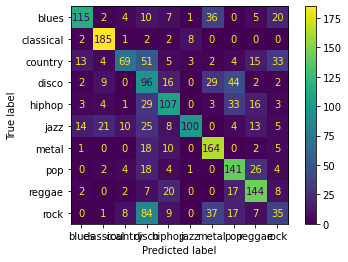

0.5791583166332666


In [6]:
y_pred = knn.predict(X_test_select)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot()

plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)